### Analytics of Students Performance and Prediction Using Machine Learning Techniques

### Background 
> In today's world, one of the most crucial choices a student must make is selecting a suitable career choice while in school.  
Undoubtedly, most students often face the problem of choosing the right career path without proper guidance from qualified professional services. They usually mismatch their career path regarding their personality, skills, and interests. In most cases, students are even forced to opt for a career path such as medicine, accounting, or engineering as a result of pressure from family, and friends, and perhaps the greed for high pay.

### Project Overview
> This project focuses on investigating the factors that influence students' academic performance and also builds and train a machine-learning model to make career prediction and recommendation for students based on their academic performance.  

### Data Dictionary 
> The dataset used in this research has the following fields and can be found [here](http://roycekimmons.com/tools/generated_data/exams)
> - `gender` - male/female
> - `race/ethnicity - one of 5 combinations of race/ethnicity
> - `parent_education_level` -  highest education level of either parent
> - `lunch` - whether the student receives free/reduced or standard lunch
> - `test_prep_course` - whether the student took the test preparation course
> - `math` -  exam score in math 
> - `reading` -  exam score in reading 
> - `writing` -  exam score in writing 

In [77]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [78]:
# Load the student records into a DataFrame
std_exams_df = pd.read_csv("exams.csv")

In [79]:
# View the first 5 records
std_exams_df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math score,reading score,writing score
0,female,group C,some college,standard,none,68,71,71
1,male,group B,bachelor's degree,standard,none,67,68,59
2,female,group C,bachelor's degree,standard,none,52,60,64
3,male,group B,some college,standard,none,84,78,71
4,male,group C,high school,standard,none,69,61,61


### Exploratory Data Analysis (EDA)

In [80]:
# Checking the number of rows and columns in the dataset
std_exams_df.shape

(1000, 8)

The dataset contains `1000` entries and `8` columns

In [81]:
# Dataset categories
std_exams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math score              1000 non-null   int64 
 6   reading score           1000 non-null   int64 
 7   writing score           1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are only 2 data stypes, which are `object` and `int`

In [82]:
# Statistical distribution of the dataset
std_exams_df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.944000,69.958000,68.486000
std,14.868017,14.630047,15.189487
min,27.000000,26.000000,20.000000
25%,57.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


It can be observed that maximum percentage score across all the subjects is `100%`, while the minimum percentage score is `20%`. Also, the average score in all the subjects ranges between `66.94%` to `69.95%`.

`75%`of the students scored between `77%` and `79%` across the 3 subjects, while `50%` of the students scored between `67%` and `70%`. Also, `25%` of the students recorded between `57%` and `60%` across all the subjects.



#### Checking for NULL values.
This is need to check for `NULL` values in the dataset, as this will aid the data cleaning process.

In [83]:
# Check for NULL values
std_exams_df.isnull().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math score                0
reading score             0
writing score             0
dtype: int64

There is no `NULL` values in the dataset. 

In [84]:
# print the column labels in the dataframe
for i, v in enumerate(std_exams_df.columns):
    print(i, v)

0 gender
1 race/ethnicity
2 parent_education_level
3 lunch
4 test_prep_course
5 math score
6 reading score
7 writing score


It can be observed that the columns are not uniformly names as some have underscored (`_`) in-between words, some used forward slash (`/`), while some used space (` `), hence the need to formalise the columns names for a better analysis and prediction.

In [85]:
# Use the replace function to normalise the columns name
std_exams_df.columns = std_exams_df.columns.str.replace(' ', '_').str.replace('/', '_')


In [86]:
# Confirm if the comlums has been formalised
for i, v in enumerate(std_exams_df.columns):
    print(i, v)

0 gender
1 race_ethnicity
2 parent_education_level
3 lunch
4 test_prep_course
5 math_score
6 reading_score
7 writing_score


Going forward, a column  titled **total_score** would be added to the dataset. This will be used in ralation to other categorical variables in the dataset.

In [87]:
#  Add a new column called total_score to the dataset 
std_exams_df['total_score'] = (std_exams_df['math_score'] + 
                               std_exams_df['reading_score'] + std_exams_df['writing_score'])
# Confirming the formalised columns by viewing the last 5 records
std_exams_df.tail()

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math_score,reading_score,writing_score,total_score
995,male,group D,some high school,free/reduced,none,65,71,67,203
996,female,group D,bachelor's degree,standard,none,66,61,70,197
997,female,group B,bachelor's degree,standard,completed,74,88,87,249
998,female,group C,bachelor's degree,standard,completed,67,76,83,226
999,male,group C,some high school,free/reduced,none,42,50,41,133


Another column named `status`would be added to the dataset, this will actually determine if a student pass or fail. To determine whether a student pass or faill, a benchmark with `total_score` of `150` is set.



In [88]:
# Check students status based on their performance 
def result(total_score, math_score, writting_score, reading_score):
        if (total_score > 150 and math_score > 50 and writting_score > 
            50 and reading_score > 50):
            return "Pass"
        else:
            return "Fail"

In [89]:
# Add new column (status)
std_exams_df['status'] = std_exams_df.apply(lambda x: result(x['total_score'], x['math_score'], x['writing_score'],
                                                             x['reading_score']),axis = 1)

Preview the dataset again with the newly added 2 columns

In [90]:
# View the last 10 records
std_exams_df.tail(10)

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,status
990,male,group E,some college,free/reduced,completed,67,69,67,203,Pass
991,male,group D,some college,free/reduced,none,51,51,48,150,Fail
992,male,group C,high school,free/reduced,none,57,50,48,155,Fail
993,female,group C,some high school,free/reduced,none,50,61,58,169,Fail
994,male,group A,associate's degree,standard,none,72,60,57,189,Pass
995,male,group D,some high school,free/reduced,none,65,71,67,203,Pass
996,female,group D,bachelor's degree,standard,none,66,61,70,197,Pass
997,female,group B,bachelor's degree,standard,completed,74,88,87,249,Pass
998,female,group C,bachelor's degree,standard,completed,67,76,83,226,Pass
999,male,group C,some high school,free/reduced,none,42,50,41,133,Fail


In [91]:
# Total number of students pass or fail
std_exams_df['status'].value_counts()

Pass    812
Fail    188
Name: status, dtype: int64

It could be observed that `812` students passed while `188` students failed

### Data Visualisation 

Text(0.5, 1.0, 'Percentage of Passed students Vs. Failed students')

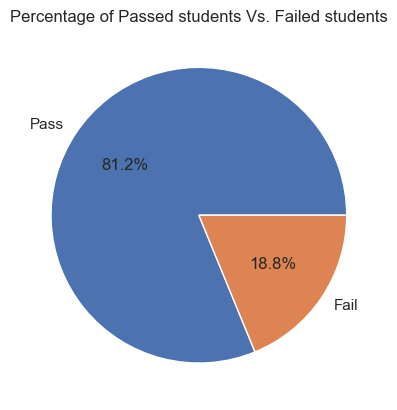

In [92]:
plt.pie(std_exams_df['status'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of Passed students Vs. Failed students')


It can be observed from above that `81.2%` of the students passed, whiel `18.8%` failed.

#### Check the students performacne across the 3 sujects in relation to gender

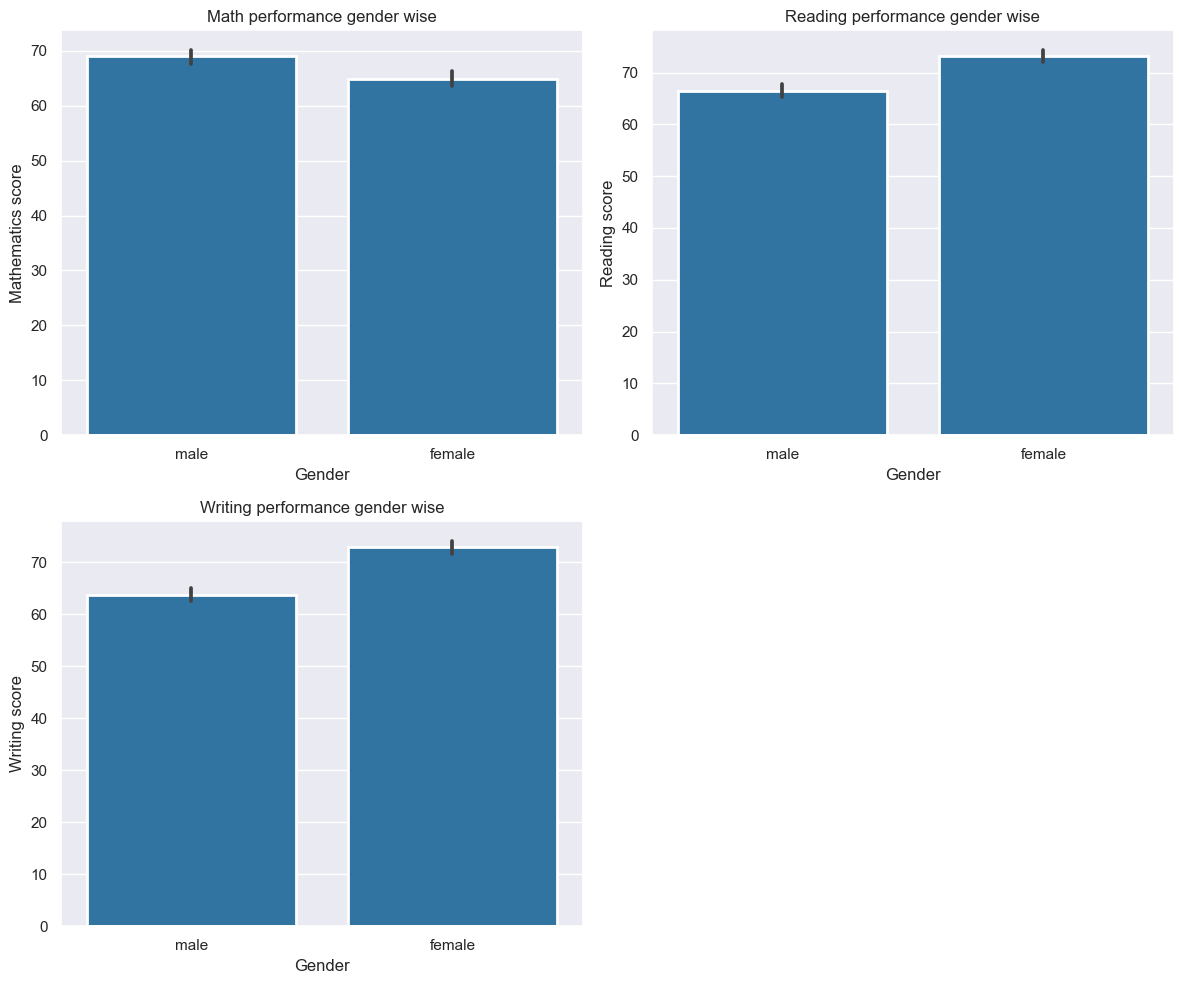

In [93]:
# Create a figure with subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set the same color palette and order for all subplots
custom_palette = ["#1f77b4"]  # Blue color for all bars
custom_order = std_exams_df.groupby('gender')['math_score'].mean().sort_values(ascending=False).index

# Create bar plots for each subject in a 2x2 grid
sns.barplot(x='gender', y='math_score', data=std_exams_df, ax=axes[0, 0], palette=custom_palette, order=custom_order, linewidth=2)
axes[0, 0].set(title='Math performance gender wise')
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Mathematics score")

sns.barplot(x='gender', y='reading_score', data=std_exams_df, ax=axes[0, 1], palette=custom_palette, order=custom_order, linewidth=2)
axes[0, 1].set(title='Reading performance gender wise')
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Reading score")

sns.barplot(x='gender', y='writing_score', data=std_exams_df, ax=axes[1, 0], palette=custom_palette, order=custom_order, linewidth=2)
axes[1, 0].set(title='Writing performance gender wise')
axes[1, 0].set_xlabel("Gender")
axes[1, 0].set_ylabel("Writing score")

# Remove empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


It can be deduced from the above graphs that females students performed better than their male counterpart in all the subjects except in math.

#### Nex, find out how ethnicity or race affect students performance

In [94]:
std_exams_df['race_ethnicity'].value_counts().reset_index()

,index,race_ethnicity
0,group C,326
1,group D,250
2,group B,194
3,group E,161
4,group A,69


Out of the `1000` students, `326` are from race group C, `250` are from group D, `194` are from group B, `161` from group E and `69` are from the race group A. Next is to actually find out how students from each race/ethnicity groups have performed comapared to each other.

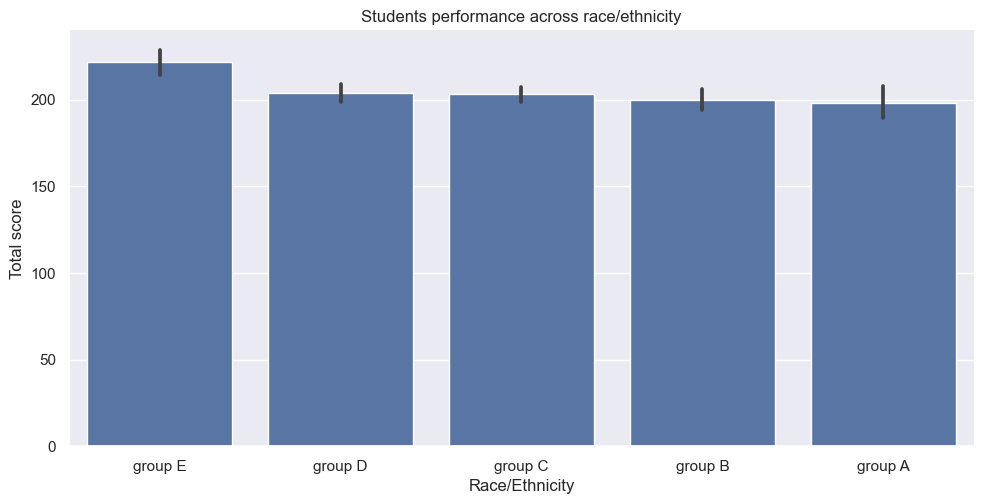

In [95]:
order_by_mean = std_exams_df.groupby('race_ethnicity')['total_score'].mean().sort_values(ascending=False).index

# Set the base color
base_color = sns.color_palette()[0]

# Create a bar plot with sorted order
sns.catplot(
    x='race_ethnicity', y='total_score', data=std_exams_df,
    kind='bar', aspect=2, color=base_color, order=order_by_mean
).set(title='Students performance across race/ethnicity')

# Set labels for x and y axes
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total score')

# Show the plot
plt.show()
sns.color_palette();

It can be observed that students from race group E have the overall performance, followed by race group D, while race group A have the least performance.

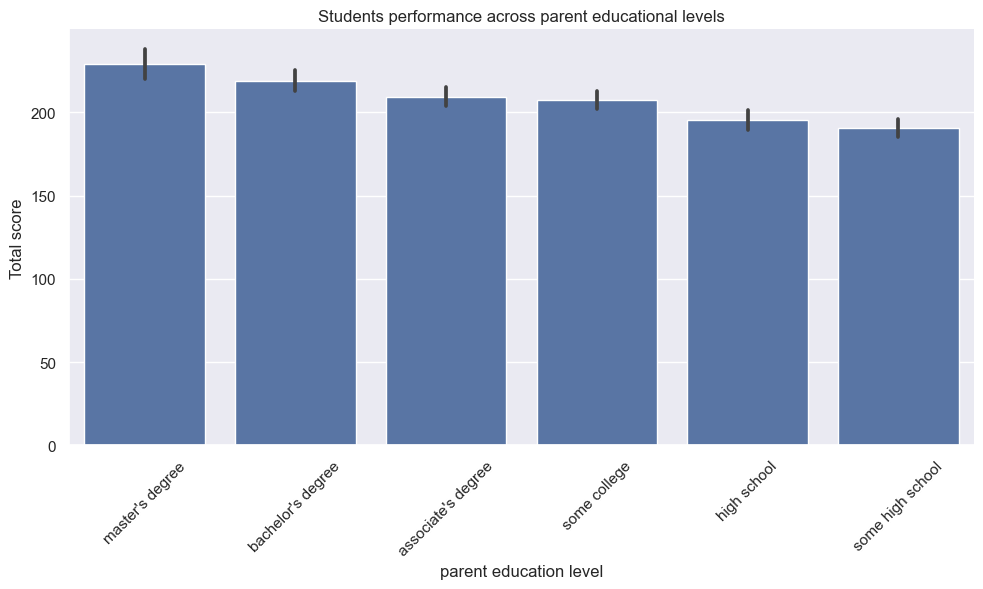

In [96]:
# Sorting the parent education levels by total score in descending order
parent_order = std_exams_df.groupby('parent_education_level')['total_score'].mean().sort_values(ascending=False).index

# Creating the catplot
sns.catplot(
    x='parent_education_level',
    y='total_score',
    data=std_exams_df,
    kind='bar',
    aspect=2,
    order=parent_order,  # Using the sorted order
    palette=[sns.color_palette()[0]] * len(parent_order)  # Using the same color for all bars
).set(title='Students performance across parent educational levels')

plt.xticks(rotation=45)
# Set labels for x and y axes
plt.xlabel('parent education level')
plt.ylabel('Total score')

plt.show()

The above grahp revealed that parent educational levels influences students performance, as students whose parents have a `master's degree` performed relatively better than their follow students. students whose parents have `some high school` recorded the least performance.

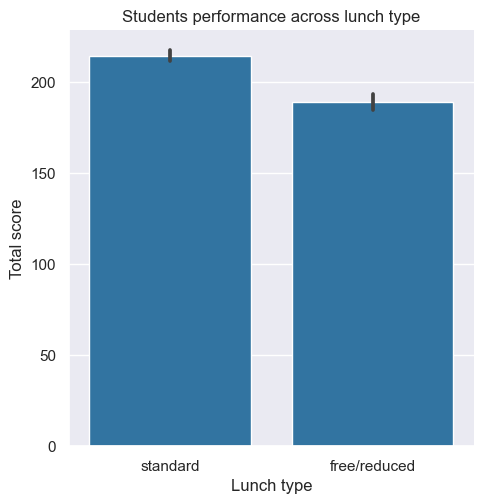

In [97]:
custom_palette = ["#1f77b4"]  # Blue color for all bars
custom_order = std_exams_df.groupby('lunch')['total_score'].mean().sort_values(ascending=False).index

# Create the catplot
sns.catplot(
    x='lunch', y='total_score', data=std_exams_df,
    kind='bar', palette=custom_palette, order=custom_order
).set(title='Students performance across lunch type')
# Set labels for x and y axes
plt.xlabel('Lunch type')
plt.ylabel('Total score')
# Show the plot
plt.show()


Students with a `standard lunch` happens to perform better than students with either `free` or `reduced lunch`.

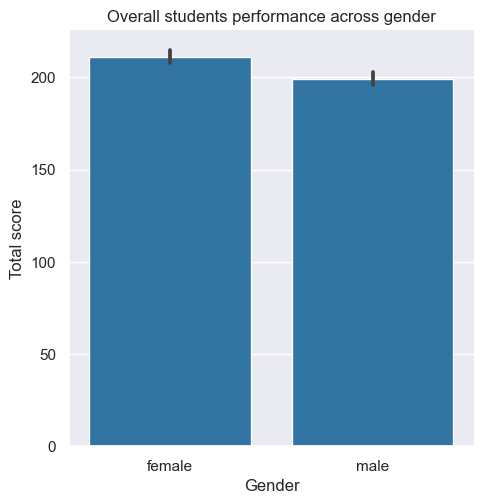

In [98]:
custom_palette = ["#1f77b4"]  # Blue color for all bars
custom_order = std_exams_df.groupby('gender')['total_score'].mean().sort_values(ascending=False).index

# Create the catplot
sns.catplot(
    x='gender', y='total_score', data=std_exams_df,
    kind='bar', palette=custom_palette, order=custom_order
).set(title='Overall students performance across gender')
# Set labels for x and y axes
plt.xlabel('Gender')
plt.ylabel('Total score')
# Show the plot
plt.show()


Overall, female students performed better than the male students.

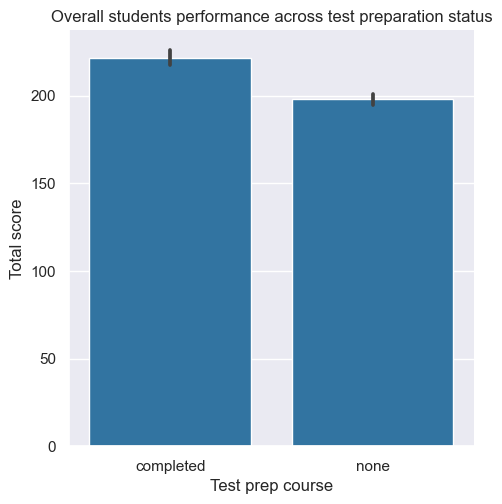

In [99]:
custom_palette = ["#1f77b4"]  # Blue color for all bars
custom_order = std_exams_df.groupby('test_prep_course')['total_score'].mean().sort_values(ascending=False).index

# Create the catplot
sns.catplot(
    x='test_prep_course', y='total_score', data=std_exams_df,
    kind='bar', palette=custom_palette, order=custom_order
).set(title='Overall students performance across test preparation status')

# Set labels for x and y axes
plt.xlabel('Test prep course')
plt.ylabel('Total score')
# Show the plot
plt.show()


Obviously, students who completed their test preparation course performs better than their counterpart who did not completed the test preparation course.

Find out if there is any student that scored `100%` in all the 3 subjects

In [100]:

std_exams_df[std_exams_df["total_score"]==300]

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,status
244,female,group E,associate's degree,standard,none,100,100,100,300,Pass
947,female,group E,associate's degree,standard,completed,100,100,100,300,Pass


2 students scored `100%` across all the 3 subjects

#### Going forward is to examine how students perform in various courses and find out if there is any corrections.

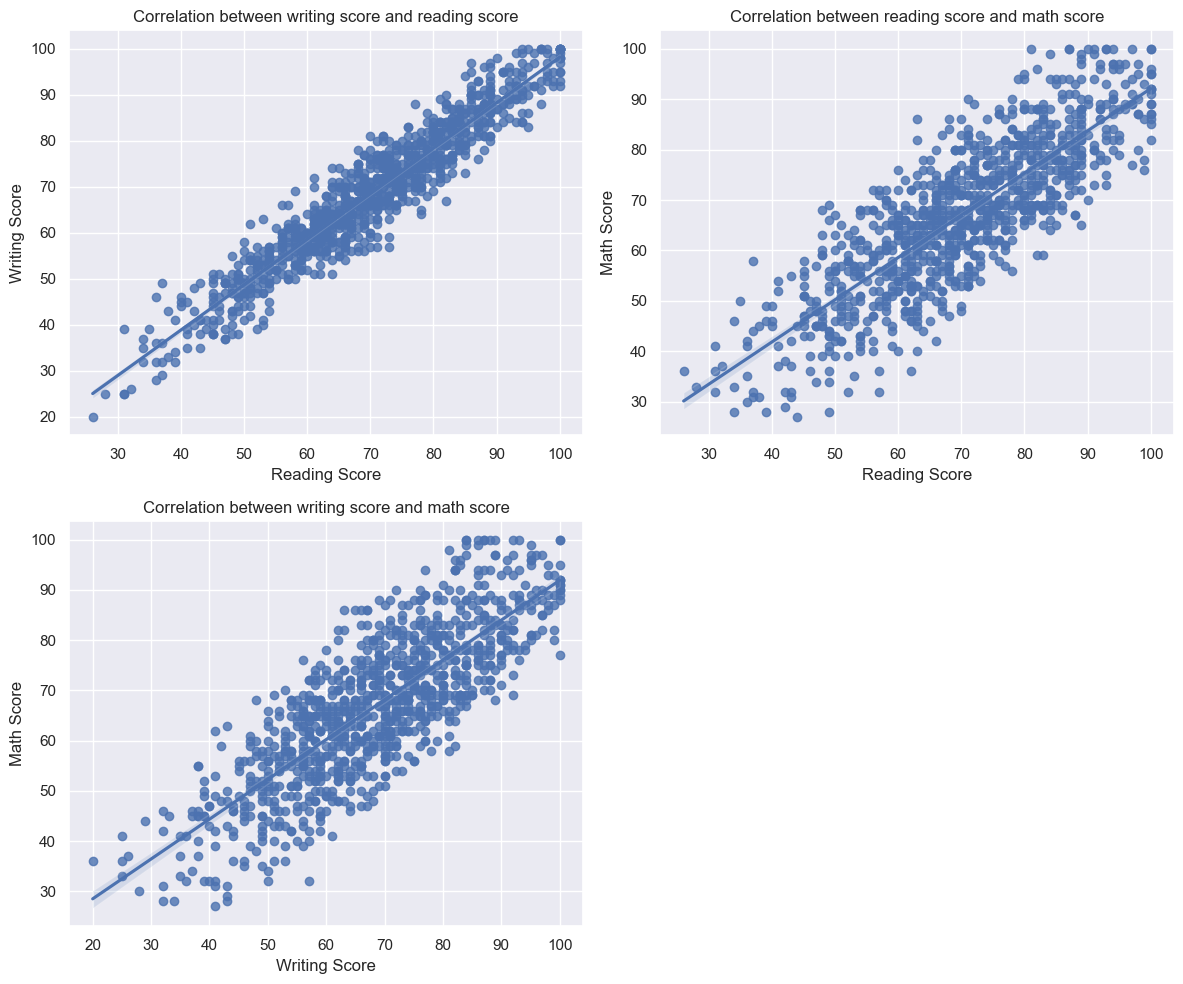

In [101]:
# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Create regression plots for each pair of scores
sns.regplot(x='reading_score', y='writing_score', data=std_exams_df, ax=ax[0, 0])
ax[0, 0].set(title='Correlation between writing score and reading score')
ax[0, 0].set_xlabel('Reading Score')
ax[0, 0].set_ylabel('Writing Score')

sns.regplot(x='reading_score', y='math_score', data=std_exams_df, ax=ax[0, 1])
ax[0, 1].set(title='Correlation between reading score and math score')
ax[0, 1].set_xlabel('Reading Score')
ax[0, 1].set_ylabel('Math Score')

sns.regplot(x='writing_score', y='math_score', data=std_exams_df, ax=ax[1, 0])
ax[1, 0].set(title='Correlation between writing score and math score')
ax[1, 0].set_xlabel('Writing Score')
ax[1, 0].set_ylabel('Math Score')

# Remove the empty subplot in the last position
fig.delaxes(ax[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

It can be observed that there is a strong positive correlation between the scores across the three subjects. For a better visualization of the correction, a heat-map is preduced below.

In [102]:
Corr_Matrix = round(std_exams_df.corr(),2)
print(Corr_Matrix)


               math_score  reading_score  writing_score  total_score
math_score           1.00           0.82           0.81         0.92
reading_score        0.82           1.00           0.95         0.97
writing_score        0.81           0.95           1.00         0.97
total_score          0.92           0.97           0.97         1.00


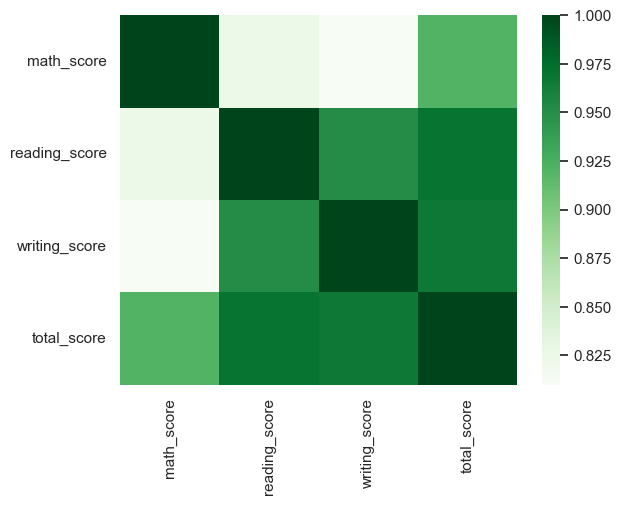

In [103]:
sns.heatmap(std_exams_df.corr(), cmap="Greens");
plt.xticks(rotation=90);

Again, the above heat-map confirmed that there is a strong correlation between `reading score` and `writing score`. Also, the `math score` is correlated with the `reading score` and `writing score`.

After an in-depth analysis, it was observed that different factors affecting students performance. These factors includes:
- gender
- race or ethinicty
- lunch type
- test preparation course
- parental level of education

###  Application of Machine Learning  Techniques 
After analyzing the data and getting insights into factors that affect students' performance. Going forward make use of machine learning techniques to make predictions and recommendations of suitable career paths for students based on their performance in `math score`, `writing score` and `reading score`.<br>
It is important to note that these career paths were not randomly assigned to the subjects, rather, they were assigned after extensive research to know which career path is suitable for a student based on performance across different subjects.



In [104]:
# Recommend career path for students based on their performance in each od the course
def possibleCareer(math_score, writting_score, reading_score):
        if (math_score > writting_score and math_score >
            reading_score ):
            return "Engineering path"
        elif (writting_score > math_score and writting_score > reading_score):
            return "Technical writting path"
        elif (reading_score > math_score and reading_score > writting_score):
            return "Mass communication path"
        elif (math_score < reading_score or math_score > reading_score and reading_score == writting_score):
            return "Law"
        elif (math_score == writting_score or  math_score == reading_score):
            return "Mathematics teaching path"
        else:
            return "No possible career path"
        

In [105]:
# Add new column (status)
std_exams_df['career_path'] = std_exams_df.apply(lambda x: possibleCareer(x['math_score'], x['writing_score'],
                                                             x['reading_score']),axis = 1)


In [106]:
# std_exams_df_1 = std_exams_df.iloc[:, 5:11]
std_exams_df.head()


,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,status,career_path
0,female,group C,some college,standard,none,68,71,71,210,Pass,Law
1,male,group B,bachelor's degree,standard,none,67,68,59,194,Pass,Mass communication path
2,female,group C,bachelor's degree,standard,none,52,60,64,176,Pass,Technical writting path
3,male,group B,some college,standard,none,84,78,71,233,Pass,Engineering path
4,male,group C,high school,standard,none,69,61,61,191,Pass,Engineering path


In [107]:
X = std_exams_df[['math_score', 'reading_score', 'writing_score']]

In [108]:
y = std_exams_df['career_path']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [110]:
# Divide data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)


In [111]:
#Logistic Regression 
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.985


In [112]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier

randfor = RandomForestClassifier()
randfor.fit(X_train, y_train)

y_pred = randfor.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.885


In [113]:
# Support vector machine 
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

svc_pred = svc.predict(X_test)

Accuracy 0.905


In [114]:
# confirming the accuracy of the prediction
predicted_career_path = logreg.predict(X)

std_exams_df['predicted_career_path'] = predicted_career_path

In [115]:
# Comparring the actual career path with the predicted career path
std_exams_df[["career_path","predicted_career_path"]].head(25)

,career_path,predicted_career_path
0,Law,Law
1,Mass communication path,Mass communication path
2,Technical writting path,Technical writting path
3,Engineering path,Engineering path
4,Engineering path,Engineering path
5,Technical writting path,Technical writting path
6,Mass communication path,Mass communication path
7,Mass communication path,Mass communication path
8,Mass communication path,Mass communication path
9,Engineering path,Engineering path


It can be observed from graph that `Logistics Regression` have the highest performance accuracy with `98.5%`, followed by `Support vector machine` with `90.5%` and `Random Forest` have the least accuracy with `88.5%`

#### Supply the model with new scores in the 3 courses for prediction 

In [116]:
# define user input scores
new_input_scores = [[40, 50, 80]]

recommended_acreer = logreg.predict(new_input_scores)

print("Based on the performance in the 3 subjects, you are adviced to pursure a career in", recommended_acreer)


Based on the performance in the 3 subjects, you are adviced to pursure a career in ['Technical writting path']


## KEY INSIGHTS
1: Deduction could be made that, students whose parents have higher educational level tends to perform better than their fellow counterparts with parents of lower educational level.<br>
2: Students who performs better in one subject, tends to also perform better in other subjects.<br>
3: Students who completed the test preparation course have higher marks than the ones who did not, perhaps, the test preparation have significant impact on overall student performance.<br>
4: Only 2 students in which both are females recorded 100% marks in all the 3 subjects. And they all belong to the same race/ethnicity, group E. Also, out of the 2 students, only one of them has completed the test preparation course. They all have their lunch to be in the standard category. They both have their parent educational levels to be in the associate's degree.

## CONCLUSION 
**Analysis**<br>
This research has shown that, there are different factors responsible for student performance in exams, these factors ranging from; parents level of education, socio-economic factor, preparation for test among others. However, there are some exceptional cases where students with a low parental level of education also recorded good performance. Similarly, some students did not completed their test preparation courses and they scored full marks in all their subjects. Perhaps, these set of students may have their own unique ways for test preparations.

Some students with Socio-economic disadvantage also appears to performed very well, perhaps these categories of students did not allow economic challenges to sabotage their efforts.<br>
Generally, there are many factors responsible for students’ performances and their level of effects differs.<br>
**NB:** There are other factors that can be considered as well, but they were not captured in the dataset. These factors includes type of facilities in school, methods of teaching, access to internet, peer group, hours of study, home lesson, teacher's qualifications and many more. These factors could have significant impact on student performance.

**Application of Machine Learning Techniques**<br>
`Random Forest`, `Logistic Regression` and `Support Vector Machines` algorithms were used to predict the possible career students can pursue beased on their performance across the 3 subject, `Logistic Regression` give the best accuracy of `98.5%`, followed by `Support Vector Machine` with `90.5%` and `Random Forest` with the least accuracy of `88.5%`.

The developed model can take scores for the 3 subjects as imputs, and predict a suitable career path a student should follow based on the student's performance in the 3 subjects.

It is important to say that, the dataset used in this research has its own limitation as only 3 subjects are available with scores which are `math`, `writing` and `reading`. Having more subjects would have help the model to make more career recommendations based on the available subjects.

